In [17]:
%matplotlib inline

import sys
import rospy
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from pathlib import Path
from scikitMedicalRobot.ros import medical_robot_helper, tf2_helper
from scikitMedicalRobot.calibration.ros_sample_tools import tool_tip_calibration_recoder
from scikitMedicalRobot.calibration.tool import tcp_calibration

Definition: link name 

In [18]:
base_link_name = 'base_link'
ee_link_name = 'tool0'
tool_link_name = 'tool_link'
medical_image_link = 'medical_link'
tool_rotation_axis = '-y'

`scikitMedicalRobot` Toolkits

In [19]:
rospy.init_node('tool_calibration_tip2tip')

th = tf2_helper()
mrh = medical_robot_helper(tool_link_name, tool_rotation_axis, ee_link_name, base_link_name, medical_image_link)

Sample Data

In [20]:
mrh.delete_all_markers()

In [21]:
sampler = tool_tip_calibration_recoder(th, ee_link_name=ee_link_name, tool_calibration_link_name=tool_link_name)
sampler.run()

In [22]:
# print('Wait 8 seconds to start data collection...')
# for _ in tqdm(range(8)):
#     rospy.sleep(1)

# n_frames = 500
# print(f'Data collection started - n_frames={n_frames}.')
# data = []
# for _ in tqdm(range(n_frames)):
#     raw_data = th.sample(ref_link=base_link_name, target_link=ee_link_name)
#     data.append(th.matrix_from_transform(raw_data.transform))
#     rospy.sleep(0.05)

# print('Data collection finished.')

Evaluation

In [23]:
file_name = Path('test_data/tool_tip_calibration/20230109_170514_740159_tool_tip_calibration_endmill.pickle')

reprojection err: 0.3850931328825827 mm
center: [-0.3412988761828336, 0.30673221144794205, 0.21323902729634128]


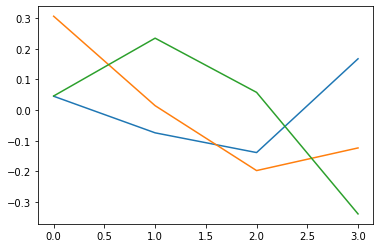

In [24]:
th.delete_all_markers()

with open(file_name, 'rb') as f:
    data = pickle.load(f)
    
tcp_cali_result = tcp_calibration.tip2tip(data)
# tcp_cali_result, solution = tcp_calibration.tip2tip_optim(data)
err, reprojection = tcp_calibration.evaluate2(tcp_cali_result, data)
print(f"reprojection err: {err * 1000} mm")

center_x = np.mean(np.array(reprojection)[:, 0])
center_y = np.mean(np.array(reprojection)[:, 1])
center_z = np.mean(np.array(reprojection)[:, 2])
print(f'center: {[center_x, center_y, center_z]}')

x_std = (np.array(reprojection)[:, 0] - center_x) * 1000
y_std = (np.array(reprojection)[:, 1] - center_y) * 1000
z_std = (np.array(reprojection)[:, 2] - center_z) * 1000
plt.plot(x_std)
plt.plot(y_std)
plt.plot(z_std)
plt.show()